In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import pastas as ps

In [2]:
head = pd.read_csv(
    "heads_issue_pap.csv", parse_dates=["date"], index_col="date"
).squeeze()
sea = pd.read_csv(
    "sealevel_issue_pap.csv", parse_dates=["date"], index_col="date"
).squeeze()
rain = pd.read_csv(
    "rain_issue_pap.csv", parse_dates=["date"], index_col="date"
).squeeze()
well = pd.read_csv(
    "well_issue_pap.csv", parse_dates=["date"], index_col="date"
).squeeze()

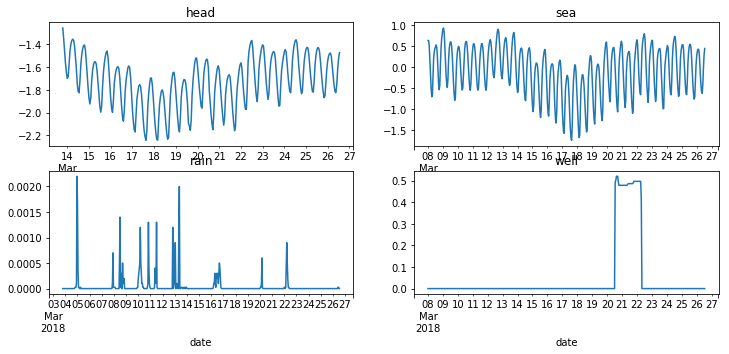

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(221)
head.plot(title="head")
plt.subplot(222)
sea.plot(title="sea")
plt.subplot(223)
rain.plot(title="rain")
plt.subplot(224)
well.plot(title="well")

INFO: Inferred frequency from time series  head: freq=H 
INFO: Inferred frequency from time series  sealevel: freq=H 
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Model Results  head            Fit Statistics
nfev     20                     EVP     87.54
nobs     307                    R2       0.88
noise    0                      RMSE     0.08
tmin     2018-03-13 19:00:00    AIC       nan
tmax     2018-03-26 13:00:00    BIC       nan
freq     H                      ___          
warmup   3650                   ___          
solver   LeastSquares           ___          

Parameters (3 were optimized)
             optimal   stderr    initial vary
sea_A       0.351046   ±2.25%   1.735779    1
sea_a       0.018485  ±16.65%  10.000000    1
constant_d -1.655760   ±0.29%  -1.730707    1


<Figure size 648x180 with 0 Axes>

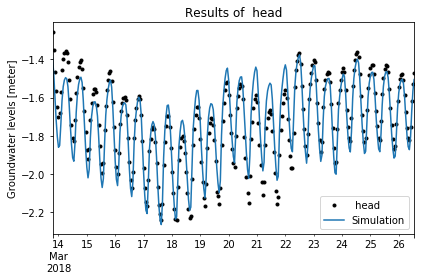

In [4]:
ml = ps.Model(head)
ml.settings["freq"] = "H"
sm1 = ps.StressModel(sea, ps.Exponential(), name="sea", settings="waterlevel")
ml.add_stressmodel(sm1)
ml.solve(noise=False)
plt.figure(figsize=(9, 2.5))
ml.plot()

INFO: Inferred frequency from time series  head: freq=H 
INFO: Inferred frequency from time series  sealevel: freq=H 
INFO: Inferred frequency from time series  rain: freq=H 
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Model Results  head                 Fit Statistics
nfev     38                     EVP          91.01
nobs     307                    R2            0.91
noise    0                      RMSE          0.07
tmin     2018-03-13 19:00:00    AIC            nan
tmax     2018-03-26 13:00:00    BIC            nan
freq     H                      ___               
warmup   3650                   ___               
solver   LeastSquares           ___               

Parameters (5 were optimized)
                optimal   stderr      initial vary
sea_A          0.358795   ±1.96%     1.735779    1
sea_a          0.018022  ±14.51%    10.000000    1
rain_A      1553.258410   ±9.10%  4568.006130    1
rain_a         1.918102  ±17.23%    10.000000    1
constant_d    -1.714469   ±0.44%    -1.730707    1


<Figure size 648x180 with 0 Axes>

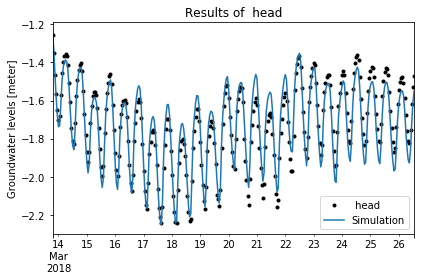

In [5]:
ml2 = ps.Model(head)
ml2.settings["freq"] = "H"
sm1 = ps.StressModel(sea, ps.Exponential(), name="sea", settings="waterlevel")
sm2 = ps.StressModel(rain, ps.Exponential(), name="rain", settings="prec")
ml2.add_stressmodel(sm1)
ml2.add_stressmodel(sm2)
ml2.solve(noise=False)
plt.figure(figsize=(9, 2.5))
ml2.plot()

INFO: Inferred frequency from time series  head: freq=H 
INFO: Inferred frequency from time series  sealevel: freq=H 
INFO: Inferred frequency from time series  rain: freq=H 
INFO: Inferred frequency from time series  discharge: freq=H 
INFO: Time Series  discharge: values of stress were transformed to daily values (frequency not altered) with: divide
INFO: Time Series  discharge: values of stress were transformed to daily values (frequency not altered) with: divide
INFO: Time Series  discharge: 1 nan-value(s) was/were found and filled with: 0.0
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
INFO: Time Series  discharge: values of stress were transformed to

Model Results  head                 Fit Statistics
nfev     51                     EVP          95.03
nobs     307                    R2            0.95
noise    0                      RMSE          0.05
tmin     2018-03-13 19:00:00    AIC            nan
tmax     2018-03-26 13:00:00    BIC            nan
freq     H                      ___               
warmup   3650                   ___               
solver   LeastSquares           ___               

Parameters (7 were optimized)
               optimal    stderr      initial vary
sea_A         0.359594    ±1.44%     1.735779    1
sea_a         0.019733    ±9.45%     0.100000    1
rain_A      840.497570   ±12.73%  4568.006130    1
rain_a        1.655742   ±22.65%    10.000000    1
well_A       -0.011514    ±6.48%    -0.288807    1
well_a        0.013223  ±206.26%     0.100000    1
constant_d   -1.666247    ±0.36%    -1.730707    1


<Figure size 648x180 with 0 Axes>

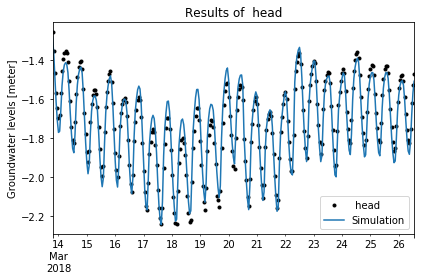

In [6]:
ml3 = ps.Model(head)
ml3.settings["freq"] = "H"
sm1 = ps.StressModel(sea, ps.Exponential(), name="sea", settings="waterlevel")
sm2 = ps.StressModel(rain, ps.Exponential(), name="rain", settings="prec")
sm3 = ps.StressModel(well, ps.Exponential(), name="well", settings="well", up=False)
sm1.set_initial("sea_a", 0.1)
sm3.set_initial("well_a", 0.1)
ml3.add_stressmodel(sm1)
ml3.add_stressmodel(sm2)
ml3.add_stressmodel(sm3)
ml3.solve(noise=False)
plt.figure(figsize=(9, 2.5))
ml3.plot()

/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
INFO: Time Series  discharge: values of stress were transformed to daily values (frequency not altered) with: divide
INFO: Time Series  discharge: 1 nan-value(s) was/were found and filled with: 0.0


(array([736768., 736770., 736772., 736774., 736776., 736778.]),
 <a list of 6 Text xticklabel objects>)

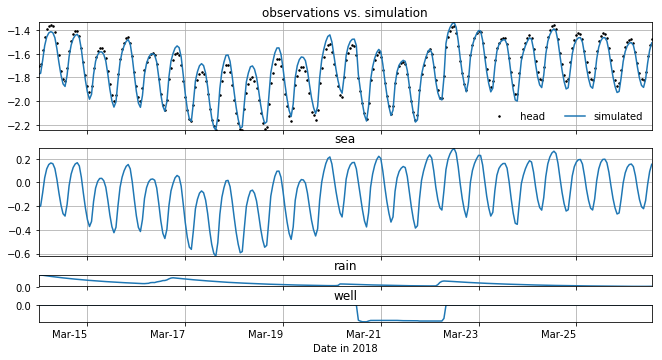

In [7]:
ax0, ax1, ax2, ax3 = ml3.plots.decomposition(
    name="simulated", figsize=(9, 5), ytick_base=0.2, tmin="14-3-2018"
)
days = mdates.DayLocator()  # every month
days_fmt = mdates.DateFormatter("%b-%d")
ax3.xaxis.set_major_formatter(days_fmt)
plt.subplots_adjust(hspace=0.3)
plt.xlabel("Date in 2018")
plt.xticks(rotation="horizontal")

INFO: Time Series  discharge: values of stress were transformed to daily values (frequency not altered) with: divide
INFO: Time Series  discharge: 1 nan-value(s) was/were found and filled with: 0.0
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


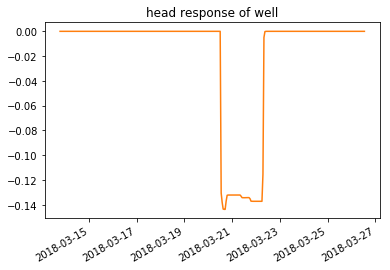

In [8]:
h3 = ml3.get_contribution("well")
h3.plot(x_compat=True, label="well", color="C1", title="head response of well");

### Custom figures for paper

Text(0.5,0,'Date in 2018')

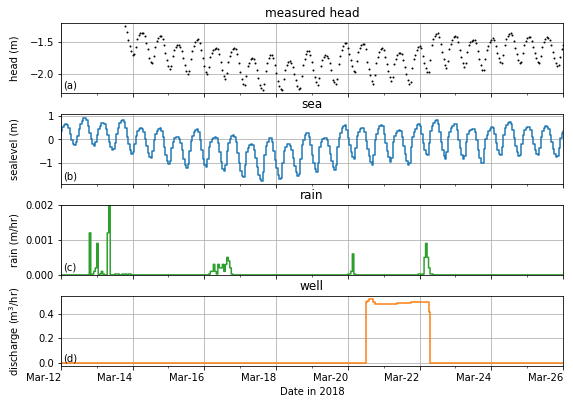

In [9]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True, figsize=(9, 7))
head.plot(x_compat=True, ax=ax0, style=".", color="k", markersize=2)
ax0.set_xlim(datetime.datetime(2018, 3, 12), datetime.datetime(2018, 3, 26))
ax0.grid(True)
ax0.set_title("measured head")
ax0.set_ylabel("head (m)", labelpad=10)
ax0.text(0.005, 0.06, "(a)", transform=ax0.transAxes)
#
sea.plot(x_compat=True, ax=ax1, drawstyle="steps", color="C0")
ax1.set_xlim(datetime.datetime(2018, 3, 12), datetime.datetime(2018, 3, 26))
ax1.grid(True)
ax1.set_title("sea")
ax1.set_ylabel("sealevel (m)", labelpad=20)
ax1.text(0.005, 0.06, "(b)", transform=ax1.transAxes)
#
rain.plot(x_compat=True, ax=ax2, drawstyle="steps", color="C2")
ax2.set_xlim(datetime.datetime(2018, 3, 12), datetime.datetime(2018, 3, 26))
ax2.grid(True)
ax2.set_ylim(0, 0.002)
ax2.set_yticks([0, 0.001, 0.002])
ax2.set_title("rain")
ax2.set_ylabel("rain (m/hr)", labelpad=6)
ax2.text(0.005, 0.06, "(c)", transform=ax2.transAxes)
#
well.plot(x_compat=True, ax=ax3, drawstyle="steps", color="C1")
ax3.set_xlim(datetime.datetime(2018, 3, 12), datetime.datetime(2018, 3, 26))
ax3.grid(True)
ax3.set_title("well")
ax3.set_ylabel("discharge (m$^3$/hr)", labelpad=15)
ax3.text(0.005, 0.06, "(d)", transform=ax3.transAxes)
#
days = mdates.DayLocator()  # every month
days_fmt = mdates.DateFormatter("%b-%d")
ax3.xaxis.set_major_formatter(days_fmt)
plt.subplots_adjust(hspace=0.3)
plt.xticks(rotation="horizontal")
plt.xlabel("Date in 2018")
# plt.savefig('issuepap_ex_fig1_new.eps')

/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Text(0.5,0,'Date in 2018')

<Figure size 648x360 with 0 Axes>

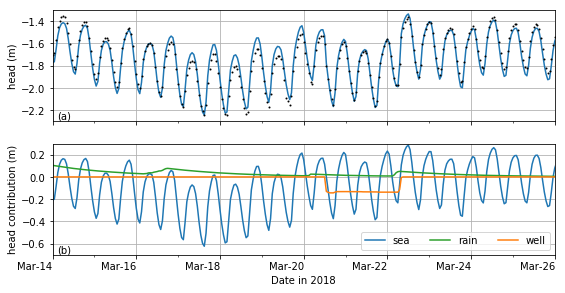

In [10]:
h0 = ml3.simulate()
h1 = ml3.get_contribution("sea")
h2 = ml3.get_contribution("rain")
h3 = ml3.get_contribution("well")
plt.figure(figsize=(9, 5))
fig, axes = plt.subplots(
    2,
    1,
    sharex=True,
    figsize=(9, 5),
)
h0.plot(ax=axes[0], x_compat=True)
head.plot(x_compat=True, ax=axes[0], style=".", color="k", markersize=2)
plt.grid()
h1.plot(ax=axes[1], x_compat=True, label="sea")
h2.plot(ax=axes[1], x_compat=True, label="rain", color="C2")
h3.plot(ax=axes[1], x_compat=True, label="well", color="C1")
axes[0].set_ylim(-2.3, -1.3)
axes[0].set_ylabel("head (m)")
plt.text(0.01, 0.02, "(a)", transform=axes[0].transAxes)
axes[1].set_ylim(-0.7, 0.3)
axes[1].set_ylabel("head contribution (m)")
plt.legend(ncol=3)
for i in range(2):
    axes[i].grid()
    axes[i].set_xlim(datetime.datetime(2018, 3, 14), datetime.datetime(2018, 3, 26))
plt.text(0.01, 0.02, "(b)", transform=axes[1].transAxes)
#
days = mdates.DayLocator()  # every month
days_fmt = mdates.DateFormatter("%b-%d")
axes[1].xaxis.set_major_formatter(days_fmt)
plt.xticks(rotation="horizontal")
plt.xlabel("Date in 2018")
# plt.savefig('issuepap_ex_fig2_new.eps')